<a href="https://colab.research.google.com/github/SegunAdenaike/Potential-Customer-Prediction/blob/main/Potential_Customer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POTENTIAL CUSTOMER PREDICTION**

---


## **DATA AQUISITION**

In [ ]:
# import dataframe and numpy package
import pandas as pd
import numpy as np

In [ ]:
# read data from source
data_link  = "https://drive.google.com/uc?id=1Pl6qEBYtxwtSjcNhMLT70AwOSLveyrjE"

transaction_df = pd.read_excel(data_link, 'Transactions')
newcustomer_df = pd.read_excel(data_link, 'NewCustomerList')

In [ ]:
# display top 5 rows of transactions data
transaction_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,age,age_group,job_industry_category,wealth_segment,owns_car,tenure,postcode,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,product_age
0,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10,2003-09-09,20
1,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,431.33,2011-03-16,12
2,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,57.73,2002-03-22,21
3,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,75.75,1991-08-05,32
4,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2005-08-09,18


In [ ]:
# display top 5 rows of new customer list data
newcustomer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,job_title,job_industry_category,wealth_segment,...,owns_car,tenure,address,postcode,remoteness_area,state,country,property_valuation,Rank,Value
0,Abbie,Oldman,Male,82,1983-11-26,40,40-44,NaN,Health,High Net Worth,...,Yes,5,4 North Drive,2168,Major Cities of Australia,NSW,Australia,8,212,1.136875
1,Abigale,Sives,Female,48,1963-12-13,60,60-64,VP Marketing,Health,Affluent Customer,...,Yes,14,2 Glendale Center,4207,Major Cities of Australia,QLD,Australia,4,230,1.109375
2,Abner,Fraschetti,Male,33,1986-01-23,37,35-39,Staff Scientist,Argiculture,Affluent Customer,...,No,13,67 Northport Avenue,3805,Major Cities of Australia,VIC,Australia,7,166,1.175000
3,Adolpho,Bellerby,Male,46,1944-10-25,79,70above,VP Sales,Financial Services,High Net Worth,...,Yes,13,2763 Buhler Circle,4305,Major Cities of Australia,QLD,Australia,4,486,0.875000
4,Adria,Van den Velde,Female,39,1978-07-10,45,45-49,Nuclear Power Engineer,Manufacturing,Affluent Customer,...,Yes,9,6030 Becker Plaza,2261,Major Cities of Australia,NSW,Australia,7,810,0.587500


## **DATA EXPLORATION AND CLEANING**

In [ ]:
# transactions data info
print(transaction_df.info(), "\n")  # display attributes (column) data type and number of non-empty cells
print("Number of rows (observations) is", transaction_df.shape[0], "and", "Number of columns (attributes) is" , transaction_df.shape[1])  # Number of rows and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19800 non-null  int64         
 1   gender                               19800 non-null  object        
 2   past_3_years_bike_related_purchases  19800 non-null  int64         
 3   age                                  19800 non-null  int64         
 4   age_group                            19800 non-null  object        
 5   job_industry_category                16602 non-null  object        
 6   wealth_segment                       19800 non-null  object        
 7   owns_car                             19800 non-null  object        
 8   tenure                               19362 non-null  float64       
 9   postcode                             19773 non-null  float64       
 10  remoteness

In [ ]:
# new customer list data info
print(newcustomer_df.info(), "\n")  # display attributes (column) data type and number of non-empty cells
print("Number of rows (observations) is", newcustomer_df.shape[0], "and", "Number of columns (attributes) is" , newcustomer_df.shape[1])  # Number of rows and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  1000 non-null   datetime64[ns]
 5   age                                  1000 non-null   int64         
 6   age_group                            1000 non-null   object        
 7   job_title                            894 non-null    object        
 8   job_industry_category                835 non-null    object        
 9   wealth_segment                       1000 non-null   object        
 10  deceased_indi

### Fill Missing Values for Transaction and New Customer List

In [ ]:
# transactions data: Fill missing values with the mean for continuous columns
for col in transaction_df.select_dtypes(include=['int', 'float']).columns:
    transaction_df[col].fillna(transaction_df[col].mean().round(), inplace=True)

# transactions data: Fill missing values with the mode for categorical columns
for col in transaction_df.select_dtypes(include='object').columns:
    transaction_df[col].fillna(transaction_df[col].mode()[0], inplace=True)

print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19800 non-null  int64         
 1   gender                               19800 non-null  object        
 2   past_3_years_bike_related_purchases  19800 non-null  int64         
 3   age                                  19800 non-null  int64         
 4   age_group                            19800 non-null  object        
 5   job_industry_category                19800 non-null  object        
 6   wealth_segment                       19800 non-null  object        
 7   owns_car                             19800 non-null  object        
 8   tenure                               19800 non-null  float64       
 9   postcode                             19800 non-null  float64       
 10  remoteness

In [ ]:
# new customer list data: Fill missing values with the mean for continuous columns
for col in newcustomer_df.select_dtypes(include=['int', 'float']).columns:
    newcustomer_df[col].fillna(newcustomer_df[col].mean().round(), inplace=True)

# new customer list data: Fill missing values with the mode for categorical columns
for col in newcustomer_df.select_dtypes(include='object').columns:
    newcustomer_df[col].fillna(newcustomer_df[col].mode()[0], inplace=True)

newcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  1000 non-null   datetime64[ns]
 5   age                                  1000 non-null   int64         
 6   age_group                            1000 non-null   object        
 7   job_title                            1000 non-null   object        
 8   job_industry_category                1000 non-null   object        
 9   wealth_segment                       1000 non-null   object        
 10  deceased_indi

## **DATA DESCRIPTIVE STATISTICS**

In [ ]:
# transaction summary statistics for numerical values
transaction_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,19800.0,1738.795758,1011.209941,1.00,858.00,1738.00,2615.00,3500.00
past_3_years_bike_related_purchases,19800.0,48.799192,28.591006,0.00,24.00,48.00,73.00,99.00
age,19800.0,45.883434,12.484853,21.00,37.00,46.00,55.00,92.00
tenure,19800.0,10.692626,5.613048,1.00,6.00,11.00,15.00,22.00
postcode,19800.0,2988.894394,850.594333,2000.00,2200.00,2768.00,3754.00,4883.00
property_valuation,19800.0,7.516061,2.823771,1.00,6.00,8.00,10.00,12.00
product_id,19800.0,45.822879,30.566954,0.00,18.00,45.00,72.00,100.00
transaction_id,19800.0,9993.328333,5776.489389,1.00,4987.75,9994.50,14999.25,20000.00
list_price,19800.0,1108.088981,582.763905,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19800.0,556.068047,405.976881,7.21,215.14,507.58,795.10,1759.85


In [ ]:
# summary statistics for categorical values
for col in transaction_df.select_dtypes(include='object').columns:
    print(f"{col}:\n{transaction_df[col].value_counts()}\n")

gender:
Female         9921
Male           9433
Undisclosed     446
Name: gender, dtype: int64

age_group:
45-49      4664
25-29      2020
40-44      1994
50-54      1946
35-39      1912
55-59      1798
60-64      1679
30-34      1487
65-69      1468
18-24       683
70above     149
Name: age_group, dtype: int64

job_industry_category:
Manufacturing         7174
Financial Services    3841
Health                3073
Retail                1746
Property              1286
IT                    1068
Entertainment          694
Argiculture            566
Telecommunications     352
Name: job_industry_category, dtype: int64

wealth_segment:
Mass Customer        9944
High Net Worth       5046
Affluent Customer    4810
Name: wealth_segment, dtype: int64

owns_car:
Yes    9969
No     9831
Name: owns_car, dtype: int64

remoteness_area:
Major Cities of Australia    16260
Inner Regional Australia      2608
Outer Regional Australia       862
Remote Australia                59
Very Remote Australia     

## **DATA DISTRIBUTION**

In [ ]:
transaction_df['online_order'].value_counts()

True     10097
False     9703
Name: online_order, dtype: int64

data skewness:
 age                                    0.026301
past_3_years_bike_related_purchases    0.056905
property_valuation                    -0.643160
product_age                            0.115768
dtype: float64 

data kurtosis:
 age                                   -0.694647
past_3_years_bike_related_purchases   -1.176509
property_valuation                    -0.320725
product_age                           -1.230650
dtype: float64


<Axes: >

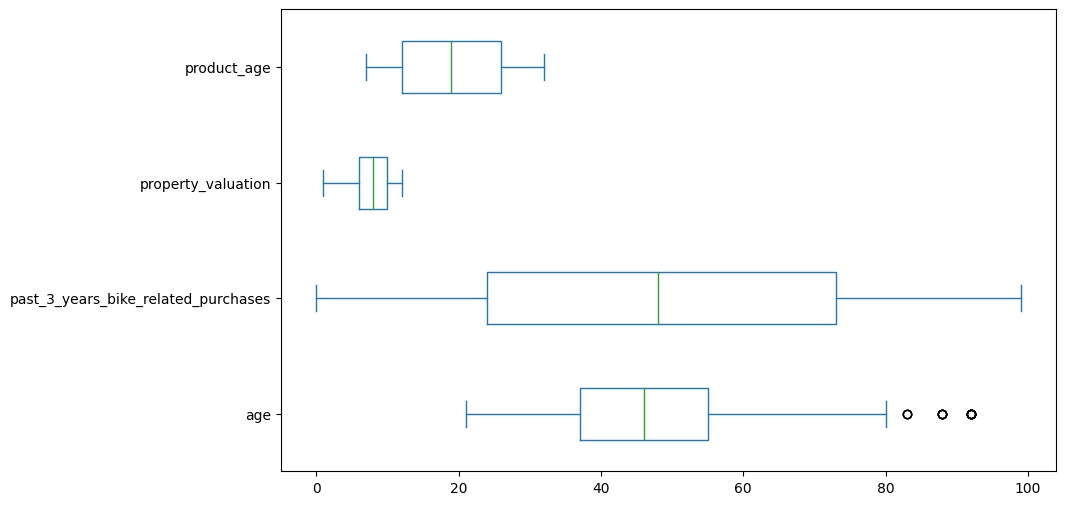

In [ ]:
# numeric variables distibution
numeric_var1 = transaction_df[['age','past_3_years_bike_related_purchases','property_valuation','product_age']]
print('data skewness:\n',numeric_var1.skew(),'\n')
print('data kurtosis:\n',numeric_var1.kurtosis())
numeric_var1.plot.box(figsize=(10,6), vert = False, grid = False)

data skewness:
 list_price      -0.126816
standard_cost    0.864009
profit           0.848548
dtype: float64 

data kurtosis:
 list_price      -1.082757
standard_cost    0.286700
profit          -0.408221
dtype: float64


<Axes: >

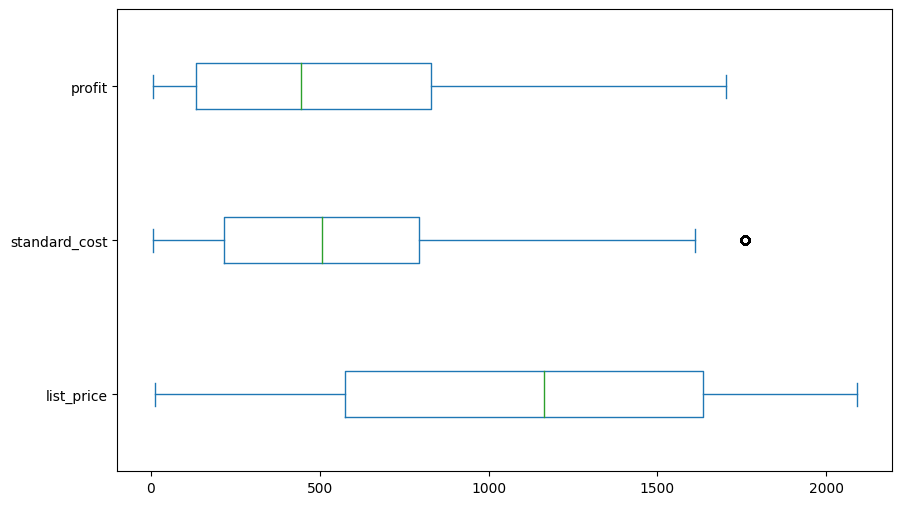

In [ ]:
# numeric variables distibution
numeric_var2 = transaction_df[['list_price',	'standard_cost',	'profit']]
print('data skewness:\n',numeric_var2.skew(),'\n')
print('data kurtosis:\n',numeric_var2.kurtosis())
numeric_var2.plot.box(figsize=(10,6), vert = False, grid = False)

## **DATA VISUALIZATION**

In [ ]:
# import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, 'Number of Sales'), Text(0.5, 0, 'Months')]

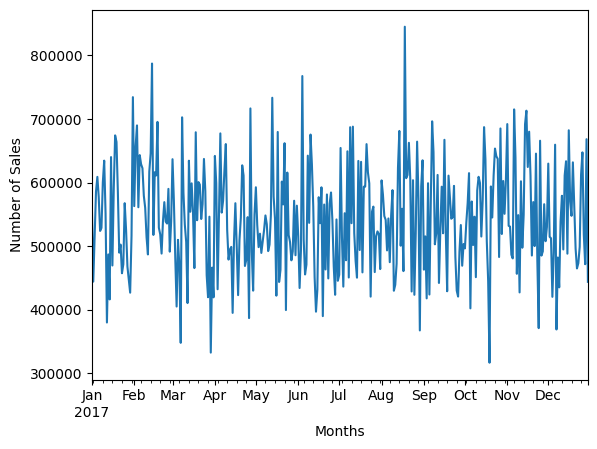

In [ ]:
# visualize number sales according to month of transaction
ax=transaction_df.groupby('transaction_date').transaction_id.sum().plot(kind='line')
ax.set(ylabel='Number of Sales', xlabel='Months')

[Text(0, 0.5, 'Brand'), Text(0.5, 0, 'Number of Sales')]

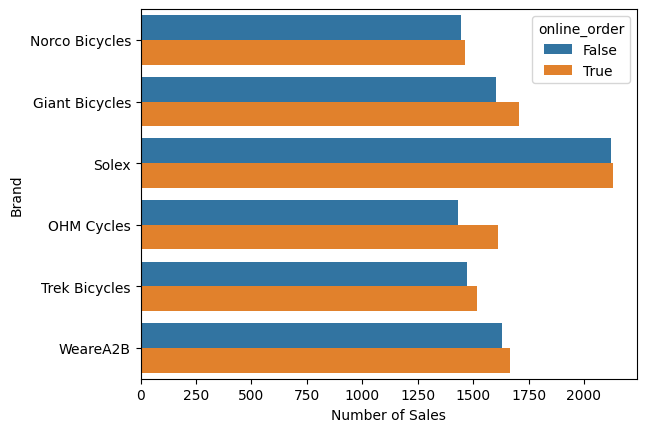

In [ ]:
# visualize brand according to number of sales
ax=sns.barplot(x='transaction_id', y='brand', data=transaction_df, estimator='count_nonzero', hue='online_order')
ax.set(ylabel='Brand', xlabel='Number of Sales')

[Text(0, 0.5, 'Brand'), Text(0.5, 0, 'Profit ($)')]

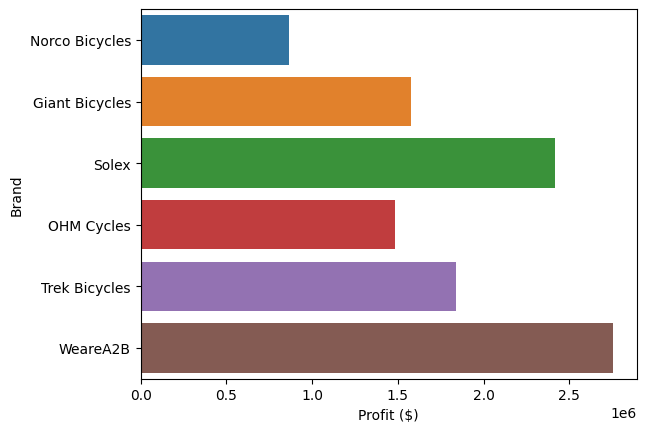

In [ ]:
# visualize brand according to profit generated
ax=sns.barplot(x='profit', y='brand', data=transaction_df, estimator='sum', errorbar=('ci', False))
ax.set(ylabel='Brand', xlabel='Profit ($)')

#transaction_df.groupby('brand').profit.sum().plot(kind='barh')

[Text(0, 0.5, 'profit ($)'), Text(0.5, 0, 'Brand')]

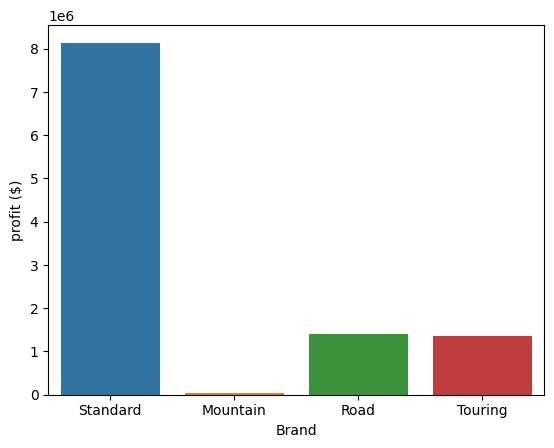

In [ ]:
# visualize product line according to profit
ax=sns.barplot(x='product_line', y='profit', data=transaction_df, estimator='sum', errorbar=('ci', False))
ax.set(ylabel='profit ($)', xlabel='Brand')

[Text(0, 0.5, 'Age Group'), Text(0.5, 0, 'Number of Sales')]

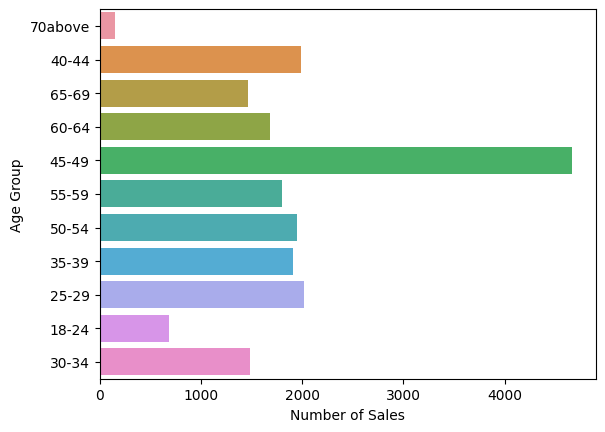

In [ ]:
# visualize number of sales according to customer gender
ax=ax=sns.barplot(x='transaction_id', y='age_group', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Age Group', xlabel='Number of Sales')

[Text(0, 0.5, 'Number of Sales'), Text(0.5, 0, 'Gender')]

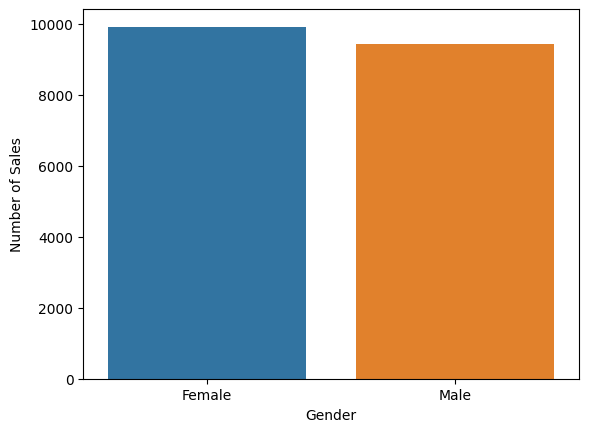

In [ ]:
# visualize number sales according to customer gender and wealth segment
ax=sns.barplot(x='gender', y='transaction_id', data=transaction_df[transaction_df.gender!='Undisclosed'], estimator='count_nonzero')
ax.set(ylabel='Number of Sales', xlabel='Gender')

[Text(0, 0.5, 'Wealth Segment'), Text(0.5, 0, 'Number of Sales')]

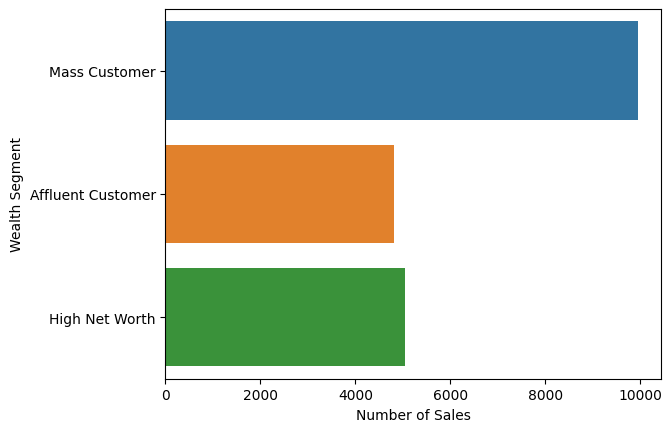

In [ ]:
# visualize number of sales according to customer wealth segment
ax=ax=sns.barplot(x='transaction_id', y='wealth_segment', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Wealth Segment', xlabel='Number of Sales')

[Text(0, 0.5, 'Job Industry'), Text(0.5, 0, 'Number of Sales')]

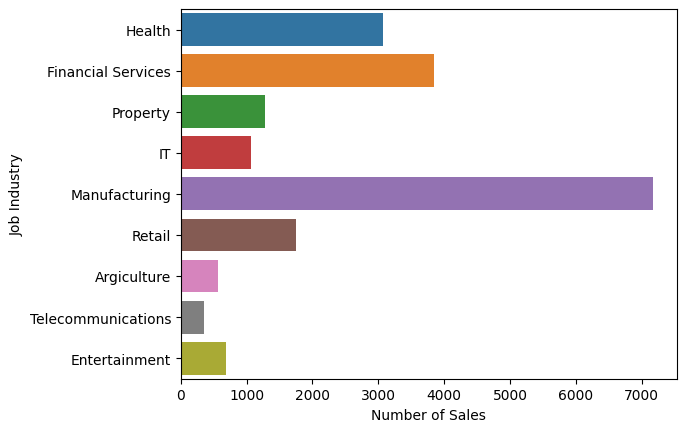

In [ ]:
# visualize number of sales according to customer job industry
ax=sns.barplot(x='transaction_id', y='job_industry_category', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Job Industry', xlabel='Number of Sales')

[Text(0, 0.5, 'Address Remoteness'), Text(0.5, 0, 'Number of Sales')]

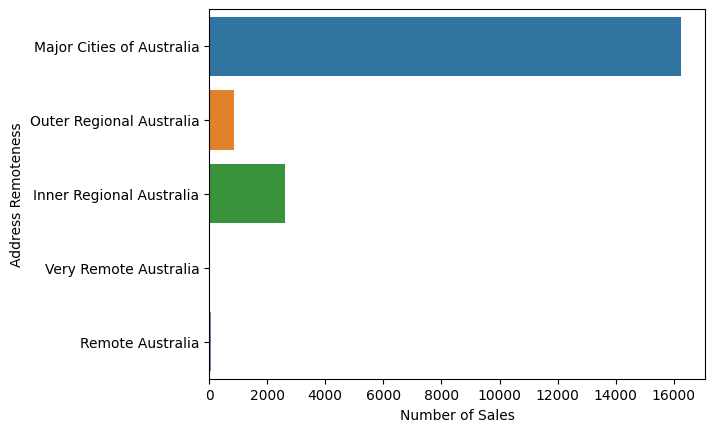

In [ ]:
# visualize number of sales according to  incustomer address remoteness
ax=sns.barplot(x='transaction_id', y='remoteness_area', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Address Remoteness', xlabel='Number of Sales')

[Text(0, 0.5, 'Number of Sales'), Text(0.5, 0, 'customer owns a car')]

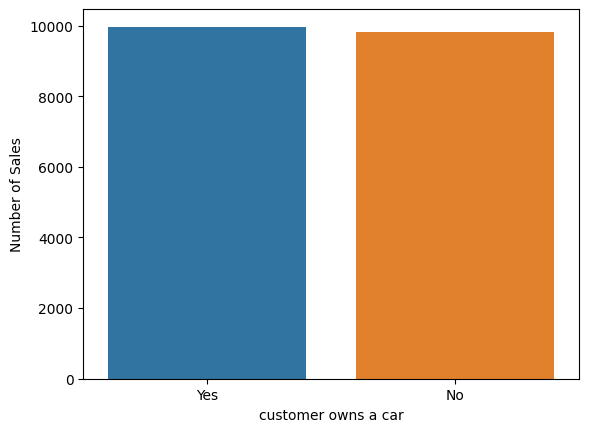

In [ ]:
# visualize number of sales according to customer who owns a car
ax=sns.barplot(x='owns_car', y='transaction_id', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Number of Sales', xlabel='customer owns a car')

[Text(0, 0.5, 'Number of Sales'), Text(0.5, 0, "Customer's Tenures")]

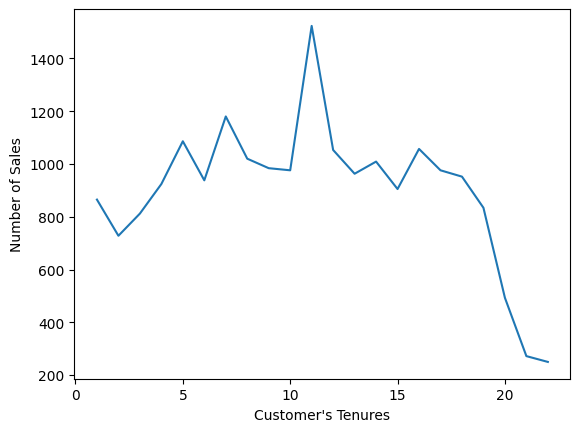

In [ ]:
# visualize number sales according to customer tenure
ax=transaction_df.groupby('tenure').transaction_id.count().plot(kind='line')
ax.set(ylabel='Number of Sales', xlabel="Customer's Tenures")

[Text(0, 0.5, 'Number of Sales'),
 Text(0.5, 0, "Customer's Property Valuation")]

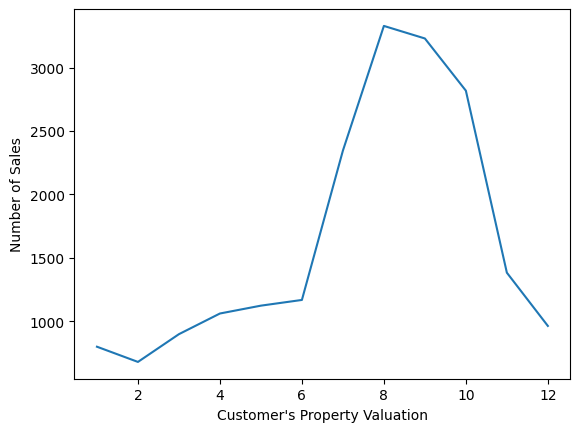

In [ ]:
# visualize number sales according to customer property valuation
ax=transaction_df.groupby('property_valuation').transaction_id.count().plot(kind='line')
ax.set(ylabel='Number of Sales', xlabel="Customer's Property Valuation")

## **CORRELATION ANALYSIS**

In [ ]:
# Import package for Onehot Encoding
from sklearn.preprocessing import LabelEncoder

train_df = transaction_df.copy()
test_df = newcustomer_df.copy()

Convert Categorical Values to Numeric in Transaction and New Customer List Datasets

In [ ]:
# transaction data: encode loyalty categorical values to numeric

le_gender = LabelEncoder()
le_gender.fit(['Female', 'Male', 'Undisclosed'])
train_df['gender'] = le_gender.transform(train_df['gender'])

le_age = LabelEncoder()
le_age.fit(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70above'])
train_df['age_group']= le_age.transform(train_df['age_group'])

le_industry = LabelEncoder()
le_industry.fit(['Manufacturing','Financial Services','Health','Retail','Property','IT','Entertainment','Argiculture','Telecommunications'])
train_df['job_industry_category'] = le_industry.transform(train_df['job_industry_category'])

le_wealth = LabelEncoder()
le_wealth.fit(['Mass Customer','High Net Worth','Affluent Customer'])
train_df['wealth_segment'] = le_wealth.transform(train_df['wealth_segment'])

le_car = LabelEncoder()
le_car.fit(['Yes', 'No'])
train_df['owns_car'] = le_car.transform(train_df['owns_car'])

le_remoteness = LabelEncoder()
le_remoteness.fit(['Major Cities of Australia','Inner Regional Australia','Outer Regional Australia','Remote Australia', 'Very Remote Australia'])
train_df['remoteness_area'] = le_remoteness.transform(train_df['remoteness_area'])

le_state = LabelEncoder()
le_state.fit(['NSW','VIC','QLD'])
train_df['state'] = le_state.transform(train_df['state'])

le_status = LabelEncoder()
le_status.fit(['Approved','Cancelled'])
train_df['order_status'] = le_status.transform(train_df['order_status'])

le_brand = LabelEncoder()
le_brand.fit(['Solex','Giant Bicycles','WeareA2B','OHM Cycles','Trek Bicycles','Norco Bicycles'])
train_df['brand'] = le_brand.transform(train_df['brand'])

le_line = LabelEncoder()
le_line.fit(['Standard','Road','Touring','Mountain'])
train_df['product_line'] = le_line.transform(train_df['product_line'])

le_class = LabelEncoder()
le_class.fit(['low','medium','high'])
train_df['product_class'] = le_class.transform(train_df['product_class'])

le_size = LabelEncoder()
le_size.fit(['small', 'medium', 'large'])
train_df['product_size'] = le_size.transform(train_df['product_size'])

train_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,age,age_group,job_industry_category,wealth_segment,owns_car,tenure,postcode,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,product_age
0,1,0,93,70,10,3,2,1,11.0,2016.0,...,0,1,2,2,1,360.40,270.30,90.10,2003-09-09,20
1,1,0,93,70,10,3,2,1,11.0,2016.0,...,0,0,2,2,1,642.70,211.37,431.33,2011-03-16,12
2,1,0,93,70,10,3,2,1,11.0,2016.0,...,0,0,2,2,1,230.91,173.18,57.73,2002-03-22,21
3,1,0,93,70,10,3,2,1,11.0,2016.0,...,0,1,0,1,2,688.63,612.88,75.75,1991-08-05,32
4,1,0,93,70,10,3,2,1,11.0,2016.0,...,0,3,2,2,1,71.49,53.62,17.87,2005-08-09,18


In [ ]:
# test data: encode loyalty categorical values to numeric

le_gender = LabelEncoder()
le_gender.fit(['Female', 'Male', 'Undisclosed'])
test_df['gender'] = le_gender.transform(test_df['gender'])

le_age = LabelEncoder()
le_age.fit(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70above'])
test_df['age_group']= le_age.transform(test_df['age_group'])

le_industry = LabelEncoder()
le_industry.fit(['Manufacturing','Financial Services','Health','Retail','Property','IT','Entertainment','Argiculture','Telecommunications'])
test_df['job_industry_category'] = le_industry.transform(test_df['job_industry_category'])

le_wealth = LabelEncoder()
le_wealth.fit(['Mass Customer','High Net Worth','Affluent Customer'])
test_df['wealth_segment'] = le_wealth.transform(test_df['wealth_segment'])

le_car = LabelEncoder()
le_car.fit(['Yes', 'No'])
test_df['owns_car'] = le_car.transform(test_df['owns_car'])

le_remoteness = LabelEncoder()
le_remoteness.fit(['Major Cities of Australia','Inner Regional Australia','Outer Regional Australia','Remote Australia', 'Very Remote Australia'])
test_df['remoteness_area'] = le_remoteness.transform(test_df['remoteness_area'])

le_state = LabelEncoder()
le_state.fit(['NSW','VIC','QLD'])
test_df['state'] = le_state.transform(test_df['state'])

test_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,job_title,job_industry_category,wealth_segment,...,owns_car,tenure,address,postcode,remoteness_area,state,country,property_valuation,Rank,Value
0,Abbie,Oldman,1,82,1983-11-26,40,4,Associate Professor,3,1,...,1,5,4 North Drive,2168,1,0,Australia,8,212,1.136875
1,Abigale,Sives,0,48,1963-12-13,60,8,VP Marketing,3,0,...,1,14,2 Glendale Center,4207,1,1,Australia,4,230,1.109375
2,Abner,Fraschetti,1,33,1986-01-23,37,3,Staff Scientist,0,0,...,0,13,67 Northport Avenue,3805,1,2,Australia,7,166,1.175000
3,Adolpho,Bellerby,1,46,1944-10-25,79,10,VP Sales,2,1,...,1,13,2763 Buhler Circle,4305,1,1,Australia,4,486,0.875000
4,Adria,Van den Velde,0,39,1978-07-10,45,5,Nuclear Power Engineer,5,0,...,1,9,6030 Becker Plaza,2261,1,0,Australia,7,810,0.587500


In [ ]:
# pearson correlation between dependent variables and dependent variable
train_df.corr(method='spearman').round(4)

<ipython-input-31-5deb10c68c79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr(method='spearman').round(4)


,customer_id,gender,past_3_years_bike_related_purchases,age,age_group,job_industry_category,wealth_segment,owns_car,tenure,postcode,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_age
customer_id,1.0000,-0.0156,0.0007,-0.0245,-0.0244,0.0191,0.0059,0.0247,-0.0241,0.0263,...,0.0035,-0.0028,-0.0056,-0.0085,-0.0028,-0.0060,0.0111,0.0044,0.0093,0.0019
gender,-0.0156,1.0000,0.0138,-0.0108,-0.0045,-0.0193,-0.0195,-0.0096,-0.0036,0.0088,...,0.0061,-0.0040,-0.0060,0.0078,-0.0021,-0.0035,0.0137,0.0067,0.0138,0.0016
past_3_years_bike_related_purchases,0.0007,0.0138,1.0000,-0.0415,-0.0402,-0.0108,-0.0006,0.0017,-0.0184,-0.0244,...,0.0027,-0.0101,0.0063,0.0100,0.0050,0.0048,0.0062,-0.0084,0.0184,-0.0051
age,-0.0245,-0.0108,-0.0415,1.0000,0.9909,0.0272,0.0061,0.0010,0.4286,-0.0161,...,-0.0034,0.0067,-0.0031,0.0108,0.0004,0.0009,-0.0034,0.0005,-0.0033,-0.0063
age_group,-0.0244,-0.0045,-0.0402,0.9909,1.0000,0.0287,0.0075,-0.0045,0.4240,-0.0142,...,-0.0053,0.0056,-0.0048,0.0107,0.0002,0.0010,-0.0022,0.0021,-0.0024,-0.0063
job_industry_category,0.0191,-0.0193,-0.0108,0.0272,0.0287,1.0000,-0.0028,-0.0167,0.0093,0.0013,...,-0.0028,-0.0045,-0.0026,-0.0038,0.0090,-0.0113,0.0009,0.0081,-0.0018,-0.0087
wealth_segment,0.0059,-0.0195,-0.0006,0.0061,0.0075,-0.0028,1.0000,-0.0266,0.0086,-0.0004,...,-0.0044,-0.0037,0.0050,-0.0063,-0.0011,0.0056,-0.0005,0.0044,-0.0013,0.0095
owns_car,0.0247,-0.0096,0.0017,0.0010,-0.0045,-0.0167,-0.0266,1.0000,-0.0039,-0.0229,...,0.0021,-0.0124,-0.0055,0.0153,0.0079,0.0060,0.0262,0.0202,0.0103,-0.0045
tenure,-0.0241,-0.0036,-0.0184,0.4286,0.4240,0.0093,0.0086,-0.0039,1.0000,0.0028,...,0.0118,0.0165,0.0033,0.0120,-0.0030,-0.0002,-0.0051,-0.0162,0.0040,-0.0017
postcode,0.0263,0.0088,-0.0244,-0.0161,-0.0142,0.0013,-0.0004,-0.0229,0.0028,1.0000,...,-0.0043,-0.0011,0.0023,-0.0059,0.0146,0.0037,0.0126,0.0084,0.0074,-0.0035


In [ ]:
# spearman correlation between dependent variables and dependent variable
train_df.corr(method='spearman')

<ipython-input-32-39a79978d42a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr(method='spearman')


,customer_id,gender,past_3_years_bike_related_purchases,age,age_group,job_industry_category,wealth_segment,owns_car,tenure,postcode,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_age
customer_id,1.000000,-0.015563,0.000652,-0.024524,-0.024372,0.019099,0.005902,0.024652,-0.024100,0.026268,...,0.003493,-0.002817,-0.005568,-0.008471,-0.002835,-0.005968,0.011142,0.004399,0.009334,0.001934
gender,-0.015563,1.000000,0.013840,-0.010769,-0.004496,-0.019346,-0.019499,-0.009558,-0.003560,0.008833,...,0.006072,-0.003971,-0.005953,0.007789,-0.002110,-0.003491,0.013662,0.006721,0.013843,0.001574
past_3_years_bike_related_purchases,0.000652,0.013840,1.000000,-0.041495,-0.040161,-0.010809,-0.000584,0.001691,-0.018388,-0.024399,...,0.002703,-0.010057,0.006261,0.009970,0.005012,0.004780,0.006220,-0.008381,0.018364,-0.005107
age,-0.024524,-0.010769,-0.041495,1.000000,0.990855,0.027156,0.006110,0.001024,0.428571,-0.016057,...,-0.003429,0.006666,-0.003140,0.010810,0.000437,0.000939,-0.003433,0.000509,-0.003323,-0.006343
age_group,-0.024372,-0.004496,-0.040161,0.990855,1.000000,0.028749,0.007549,-0.004522,0.423980,-0.014163,...,-0.005311,0.005626,-0.004811,0.010661,0.000243,0.000992,-0.002158,0.002098,-0.002379,-0.006325
job_industry_category,0.019099,-0.019346,-0.010809,0.027156,0.028749,1.000000,-0.002837,-0.016682,0.009274,0.001277,...,-0.002847,-0.004499,-0.002621,-0.003841,0.008972,-0.011275,0.000866,0.008054,-0.001820,-0.008732
wealth_segment,0.005902,-0.019499,-0.000584,0.006110,0.007549,-0.002837,1.000000,-0.026561,0.008633,-0.000385,...,-0.004435,-0.003699,0.005006,-0.006251,-0.001116,0.005643,-0.000475,0.004430,-0.001255,0.009455
owns_car,0.024652,-0.009558,0.001691,0.001024,-0.004522,-0.016682,-0.026561,1.000000,-0.003942,-0.022853,...,0.002084,-0.012436,-0.005516,0.015320,0.007868,0.005983,0.026152,0.020187,0.010292,-0.004536
tenure,-0.024100,-0.003560,-0.018388,0.428571,0.423980,0.009274,0.008633,-0.003942,1.000000,0.002803,...,0.011767,0.016470,0.003300,0.011950,-0.002990,-0.000153,-0.005140,-0.016173,0.003965,-0.001711
postcode,0.026268,0.008833,-0.024399,-0.016057,-0.014163,0.001277,-0.000385,-0.022853,0.002803,1.000000,...,-0.004311,-0.001118,0.002255,-0.005919,0.014648,0.003741,0.012580,0.008441,0.007362,-0.003531


## **FEATURES SELECTION AND DATA STANDARDIZATION**

In [ ]:
# Importing split package
from sklearn.model_selection import train_test_split

### **Features(X) and Target(y) Selection**

In [ ]:
# select X and y and standardize X
train_X = train_df[['gender','past_3_years_bike_related_purchases','age',\
                          'age_group','job_industry_category','wealth_segment',\
                          'owns_car','tenure','postcode','remoteness_area',
                          'state','property_valuation']]
train_y = train_df['product_line']

test_X = test_df[['gender','past_3_years_bike_related_purchases','age',\
                          'age_group','job_industry_category','wealth_segment',\
                          'owns_car','tenure','postcode','remoteness_area',
                          'state','property_valuation']]

## **One Hot Encoding: Convert Train and Test Features with Categorical Values to Numeric**

In [ ]:
# convert features with categroical values to numeric
train_X = pd.get_dummies(train_X, drop_first=False)
test_X = pd.get_dummies(test_X, drop_first=False)

### **Data Stardardization**

In [ ]:
# import data scaling package
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_train=scaler.fit_transform(train_X)

In [ ]:
# Separate the dummy variables from the numerical variables
train_dummy_cols = train_X.select_dtypes(include='uint8').columns
train_num_cols = list(set(train_X.select_dtypes(include=['float64', 'int64']).columns) - set(train_dummy_cols))

test_dummy_cols = test_X.select_dtypes(include='uint8').columns
test_num_cols = list(set(test_X.select_dtypes(include=['float64', 'int64']).columns) - set(test_dummy_cols))

# Standardize the numerical variables
scaler = StandardScaler()
train_X[train_num_cols] = scaler.fit_transform(train_X[train_num_cols])
test_X[test_num_cols] = scaler.fit_transform(test_X[test_num_cols])

# Combine the standardized numerical variables with the dummy variables
scaled_X_train = pd.concat([train_X[test_num_cols], train_X[train_dummy_cols]], axis=1)
scaled_X_test = pd.concat([test_X[test_num_cols], test_X[test_dummy_cols]], axis=1)

print(scaled_X_train.head(),'\n')
print(scaled_X_test.describe(),'\n')

   postcode  remoteness_area  owns_car    state  age_group  \
0 -1.143811         0.186943  0.993054 -0.85298   2.100362   
1 -1.143811         0.186943  0.993054 -0.85298   2.100362   
2 -1.143811         0.186943  0.993054 -0.85298   2.100362   
3 -1.143811         0.186943  0.993054 -0.85298   2.100362   
4 -1.143811         0.186943  0.993054 -0.85298   2.100362   

   job_industry_category       age  past_3_years_bike_related_purchases  \
0              -0.577692  1.931715                             1.546008   
1              -0.577692  1.931715                             1.546008   
2              -0.577692  1.931715                             1.546008   
3              -0.577692  1.931715                             1.546008   
4              -0.577692  1.931715                             1.546008   

     tenure    gender  property_valuation  wealth_segment  
0  0.054762 -0.960762            0.879676        0.899617  
1  0.054762 -0.960762            0.879676        0.89961

### **SMOTE**

In [ ]:
#Apply SMOTE to balance the target variable

### **Data Split**

In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X_train, train_y, test_size=0.2, random_state=50)

print("Number of X train samples:",X_train.shape[0], "and number of X test samples :", X_test.shape[0])

Number of X train samples: 15840 and number of X test samples : 3960


## **MODEL BUILDING AND ACCURACY EVALUATION**

In [ ]:
# import hyperparameters tuning package
from sklearn.model_selection import GridSearchCV

# import model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score,\
                            mean_squared_error, r2_score

### **LOGISTICS REGRESSION**

In [ ]:
# import logistics regression package
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

### **Logistics Regression Hyperparameters Tuning With GridSearch**

In [ ]:
# define hyparameters for logistic regression

hyperparameters = {'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                  'C': [0.01, 0.1, 1.0]
                  }
GS_LR = GridSearchCV(LR, hyperparameters, cv=5)

In [ ]:
# fitting the data
GS_LR.fit(X_train, y_train)

# display best hyparameters for logistic regression
best_LR = GS_LR.best_estimator_
print(GS_LR.best_params_, '\n')

# predicting the test data with the best hyperparameters
y_pred_LR = best_LR.predict(X_test)

print('Predicted y values:   ', y_pred_LR[0:5])
print('Actual y test values: ', y_test[0:5].values)

{'C': 0.01, 'solver': 'liblinear'} 

Predicted y values:    [2 2 2 2 2]
Actual y test values:  [1 1 2 2 2]


### **Logistic Regression Model Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.00      0.00      0.00       789
           2       0.71      1.00      0.83      2829
           3       0.00      0.00      0.00       246

    accuracy                           0.71      3960
   macro avg       0.18      0.25      0.21      3960
weighted avg       0.51      0.71      0.60      3960

f1 score: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


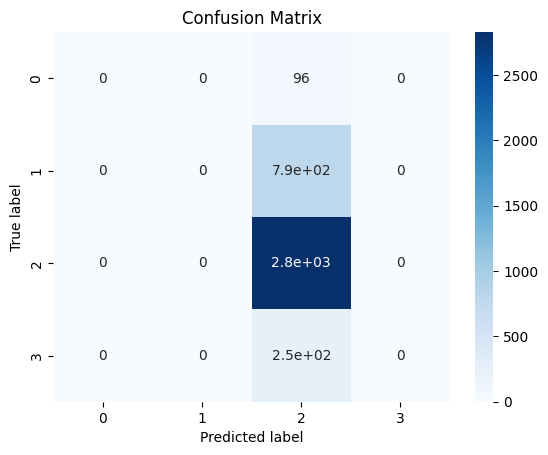

In [ ]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_LR))

# modelaccuracy score: f1-score and jaccard score
F1_LR = f1_score(y_test, y_pred_LR, average='weighted').round(2)
#J_LR = jaccard_score(y_test, y_pred_LR).round(2)

# print model accuracy scores
print('f1 score:', F1_LR)
#print('jaccard score:', J_LR,'\n')

### **Importance of Each Feature in the Logistic Regression Model**

[2.576322506739917e-05, 0.0007843372514389502, 0.00806452305417529, 0.010196270360220968, 0.010959844434788936, 0.013503603299924042, 0.01438862554780824, 0.017545725978507506, 0.018371098308366647, 0.019207468730505797, 0.019879804346084953, 0.02986977444865325] 



<BarContainer object of 12 artists>

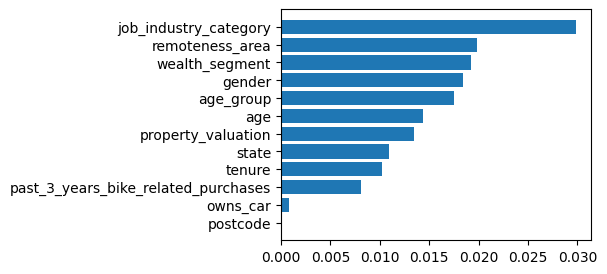

In [ ]:
features_importance = zip(abs(best_LR.coef_[0]), train_X.columns)
features_importance = sorted(features_importance, reverse=True)
features = [i[1] for i in features_importance] [::-1]
importance = [i[0] for i in features_importance][::-1]
print(importance,'\n')

# plot feature importance
plt.figure(figsize=(4, 3))
plt.barh(features, importance)

### **RANDOM FOREST**

In [ ]:
# import support random forest classifier package
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

### **Random Forest Hyperparameters Tuning With GridSearch**

In [ ]:
# define hyparameters for random forest classifier

hyperparameters = {'n_estimators': list(range(50,100,10)),
                   'max_depth': list(range(10,20,1))
                  }
GS_RF = GridSearchCV(RF, hyperparameters, cv=5)

In [ ]:
# fitting the data
GS_RF.fit(X_train, y_train)

# display best hyparameters for random forest classifier
best_RF = GS_RF.best_estimator_
print(best_RF, '\n')

# predicting the test data with the best hyperparameters
y_pred_RF = GS_RF.predict(X_test)

print('Predicted y values:   ', y_pred_RF[0:7])
print('Actual y test values: ', y_test[0:7].values)

RandomForestClassifier(max_depth=10, n_estimators=50) 

Predicted y values:    [2 2 2 2 2 2 2]
Actual y test values:  [1 1 2 2 2 2 1]


### **Random Forest Classifier Accuracy Evaluation**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.12      0.00      0.00       789
           2       0.71      1.00      0.83      2829
           3       0.00      0.00      0.00       246

    accuracy                           0.71      3960
   macro avg       0.21      0.25      0.21      3960
weighted avg       0.54      0.71      0.60      3960

f1 score: 0.6


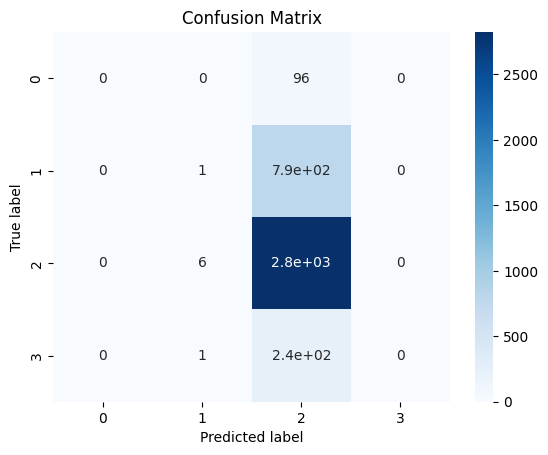

In [ ]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_RF))

# modelaccuracy score: f1-score and jaccard score
F1_RF = f1_score(y_test, y_pred_RF, average='weighted').round(2)
#J_RF = jaccard_score(y_test, y_pred_RF).round(2)

# print model accuracy scores
print('f1 score:', F1_RF)
#print('jaccard score:', J_RF,'\n')

### **Importance of Each Feature in the Random Forest Model**

<BarContainer object of 12 artists>

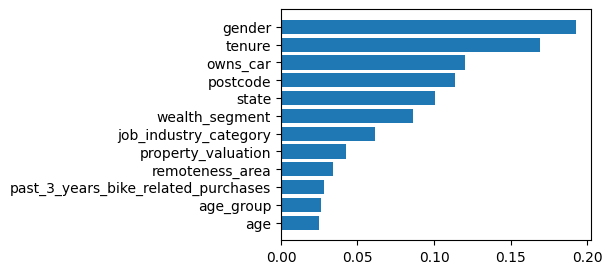

In [ ]:
# display the importance of each feature
features_importance = zip(abs(best_RF.feature_importances_), train_X.columns)
features_importance = sorted(features_importance, reverse=True)
features = [i[1] for i in features_importance] [::-1]
importance = [i[0] for i in features_importance][::-1]
#print(importance,'\n')

# plot feature importance
plt.figure(figsize=(4, 3))
plt.barh(features, importance)

## **XGBoost**

In [ ]:
# import XGB regressor package
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier()

In [ ]:
# define hyparameters for XGB regressor

hyperparameters = {'n_estimators': list(range(50,200,50)),
                   'max_depth': list(range(5,20,5))
                  }
GS_XGB = GridSearchCV(XGB, hyperparameters, cv=5)

In [ ]:
GS_XGB.fit(X_train, y_train)

# display best hyparameters for random forest classifier
best_XGB = GS_XGB.best_estimator_
print(GS_XGB.best_params_, '\n')

# predicting the test data with the best hyperparameters
y_pred_XGB = best_XGB.predict(X_test)

print('Predicted y values:   ', y_pred_XGB[0:10].round())
print('Actual y test values: ', y_test[0:10].values)

{'max_depth': 5, 'n_estimators': 50} 

Predicted y values:    [2 2 2 2 2 2 2 2 2 2]
Actual y test values:  [1 1 2 2 2 2 1 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.17      0.01      0.01       789
           2       0.71      0.99      0.83      2829
           3       0.00      0.00      0.00       246

    accuracy                           0.71      3960
   macro avg       0.22      0.25      0.21      3960
weighted avg       0.55      0.71      0.60      3960

f1 score: 0.6


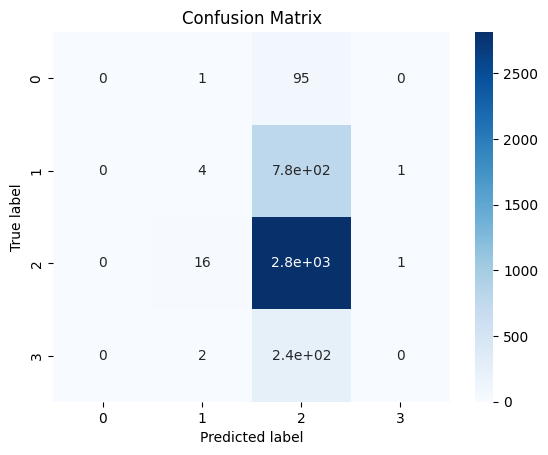

In [ ]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_XGB), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_XGB))

# modelaccuracy score: f1-score and jaccard score
F1_XGB = f1_score(y_test, y_pred_XGB, average='weighted').round(2)
#J_ANN = jaccard_score(y_test, y_pred_ANN).round(2)

# print model accuracy scores
print('f1 score:', F1_XGB)
#print('jaccard score:', J_ANN,'\n')

### **Features Importance in the XGBoost Model**

[(0.092, 'state'),
 (0.088, 'tenure'),
 (0.088, 'postcode'),
 (0.087, 'past_3_years_bike_related_purchases'),
 (0.086, 'property_valuation'),
 (0.086, 'owns_car'),
 (0.085, 'gender'),
 (0.084, 'age_group'),
 (0.08, 'remoteness_area'),
 (0.08, 'age'),
 (0.079, 'wealth_segment'),
 (0.067, 'job_industry_category')]

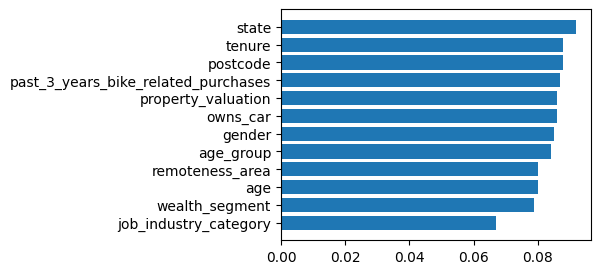

In [ ]:
# display the importance of each feature
features_importance = zip(best_XGB.feature_importances_.round(3),train_X.columns)
features_importance = sorted(features_importance, reverse=True)
features = [i[1] for i in features_importance] [::-1]
importance = [i[0] for i in features_importance ][::-1]

# plot feature importance
plt.figure(figsize=(4, 3))
plt.barh(features, importance)

features_importance

## **MODELS ACCURACY REPORT**

In [ ]:
# Models accuracy report

metrics = [['Logistic Regression', F1_LR],
           ['Random Forest', F1_RF],
           ['XGBoost', F1_XGB]]

metrics_df = pd.DataFrame(metrics, columns = ['Algorithm','F1-score']).round(2)
metrics_df.set_index('Algorithm', inplace =  True)
metrics_df.sort_values('F1-score', ascending=False, inplace=True)

metrics_df

,F1-score
Algorithm,
Logistic Regression,0.6
Random Forest,0.6
XGBoost,0.6


In [ ]:
pred_df = pd.DataFrame(y_pred_XGB)

In [ ]:
pred_df.value_counts()

2    3935
1      23
3       2
dtype: int64

In [ ]:
y_test.value_counts()

2    2829
1     789
3     246
0      96
Name: product_line, dtype: int64

In [ ]:
prod_spread = transaction_df[["customer_id", "product_line"]]
prod_spread.head()

,customer_id,product_line
0,1,Standard
1,1,Standard
2,1,Standard
3,1,Mountain
4,1,Standard


In [ ]:
prod_spread[prod_spread["customer_id"]==864]

,customer_id,product_line
4975,864,Touring
4976,864,Standard
4977,864,Standard
4978,864,Standard
4979,864,Road
4980,864,Touring
